#### Here we will be using the function which we have created in another ipynb file(AQI_2.ipynb) into this file.
#### We are doing this so as to make a complete dataframe using PM2.5 from one source and other parameters from another source
#### In other words, I am merging my independent and dependent(PM2.5) fetures into one dataframe

In [1]:
import requests
import sys
import pandas as pd
pd.options.display.max_rows = None
from bs4 import BeautifulSoup #for doing HTML WebScrapping (extracting data from HTML page)
import csv
import os

In [13]:
from ipynb.fs.defs.AQI_2 import avg_data_2013,avg_data_2014,avg_data_2015,avg_data_2016,avg_data_2017,avg_data_2018

In [3]:
q = avg_data_2013()
q

[284.79583333333335,
 219.72083333333333,
 182.1875,
 115.28749999999998,
 0.0,
 12.379166666666668,
 154.03750000000002,
 223.20833333333334,
 200.64583333333337,
 154.875,
 129.38749999999996,
 224.2458333333333,
 285.22499999999997,
 236.82499999999996,
 276.90833333333336,
 245.65,
 218.67083333333326,
 47.82500000000001,
 108.0,
 107.625,
 125.89166666666667,
 179.3083333333333,
 239.85,
 220.1916666666667,
 181.01250000000005,
 152.55416666666667,
 152.32083333333335,
 171.42916666666665,
 251.375,
 251.82916666666668,
 319.7375,
 332.7083333333333,
 279.59999999999997,
 179.11666666666667,
 166.29999999999998,
 78.25416666666666,
 54.958333333333336,
 54.791666666666664,
 93.375,
 103.0,
 211.125,
 192.29166666666666,
 152.0,
 132.20833333333334,
 127.70833333333333,
 109.33333333333333,
 0.0,
 0.0,
 0.0,
 56.458333333333336,
 135.83333333333334,
 122.5,
 119.33333333333333,
 67.125,
 46.708333333333336,
 69.66666666666667,
 79.83333333333333,
 62.708333333333336,
 81.0416666666

In [4]:
#experimenting the data extraction for January 2013 from HTML page
URL = 'https://en.tutiempo.net/climate/01-2013/ws-432950.html'
content = requests.get(URL)
soup1 = BeautifulSoup(content.text, 'html.parser')
table1 = soup1.findAll('table',{'class':'medias mensuales numspan'})
table1

[<table cellpadding="0" cellspacing="0" class="medias mensuales numspan" style="width:100%;"><tr><th>Day</th><th><abbr class="tooltip" title="Average Temperature">T</abbr></th><th><abbr class="tooltip" title="Maximum temperature">TM</abbr></th><th><abbr class="tooltip" title="Minimum temperature">Tm</abbr></th><th><abbr class="tooltip" title="Atmospheric pressure at sea level">SLP</abbr></th><th><abbr class="tooltip" title="Average relative humidity">H</abbr></th><th><abbr class="tooltip" title="Total rainfall and / or snowmelt">PP</abbr></th><th><abbr class="tooltip" title="Average visibility">VV</abbr></th><th><abbr class="tooltip" title="Average wind speed">V</abbr></th><th><abbr class="tooltip" title="Maximum sustained wind speed">VM</abbr></th><th><abbr class="tooltip" title="Maximum speed of wind">VG</abbr></th><th><abbr class="tooltip" title="Indicate if there was rain or drizzle (In the monthly average, total days it rained)">RA</abbr></th><th><abbr class="tooltip" title="Snow 

# 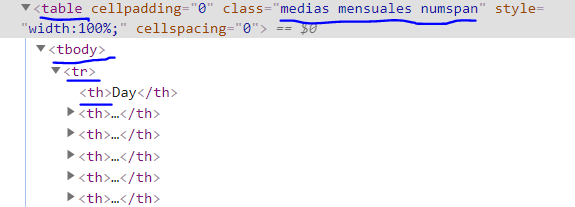
https://en.tutiempo.net/climate/01-2013/ws-432950.html

#### right click and goto inspect elements

In [5]:
#experimenting- fetching each row and appending it to a list
horizontal_data = []
for tbody1 in table1:
    for tr1 in tbody1:
        a1 = tr1.get_text()
        horizontal_data.append(a1)
horizontal_data

['DayTTMTmSLPHPPVVVVMVGRASNTSFG',
 '123.430.319-5906.34.35.4-\xa0\xa0\xa0\xa0',
 '222.430.316.9-5706.93.37.6-\xa0\xa0\xa0\xa0',
 '32431.816.9-5106.92.85.4-\xa0\xa0\xa0\xa0',
 '4\xa0\xa0\xa0\xa0',
 '5\xa0\xa0\xa0\xa0',
 '6\xa0\xa0\xa0\xa0',
 '722.830.217.6-5507.73.77.6-\xa0\xa0\xa0\xa0',
 '823.130.617.4-4606.93.35.4-\xa0\xa0\xa0\xa0',
 '922.930.617.4-5106.93.53.5-\xa0\xa0\xa0\xa0',
 '10\xa0\xa0\xa0\xa0',
 '11\xa0\xa0\xa0\xa0',
 '12\xa0\xa0\xa0\xa0',
 '1322.330.115.7-4306.92.85.4-\xa0\xa0\xa0\xa0',
 '1421.830.614.8-4106.91.95.4-\xa0\xa0\xa0\xa0',
 '1521.630.614.2-4306.93.17.6-\xa0\xa0\xa0\xa0',
 '16\xa0\xa0\xa0\xa0',
 '17\xa0\xa0\xa0\xa0',
 '18\xa0\xa0\xa0\xa0',
 '1921.629.616.4-5806.92.23.5-\xa0\xa0\xa0\xa0',
 '2021.929.616.6-5806.92.45.4-\xa0\xa0\xa0\xa0',
 '2122.329.917.5-5506.93.15.4-\xa0\xa0\xa0\xa0',
 '22\xa0\xa0\xa0\xa0',
 '23\xa0\xa0\xa0\xa0',
 '24\xa0\xa0\xa0\xa0',
 '2521.629.115.5-4707.74.87.6-\xa0\xa0\xa0\xa0',
 '2621.829.214.6-4106.92.83.5-\xa0\xa0\xa0\xa0',
 '2722.330.115.6-

In [6]:
len(horizontal_data)

34

In [7]:
round(34/15)

2

In [8]:
finalD1 = []
for times in range(round(34/15)):
        newtempD = []
        for i in range(15):
            newtempD.append(horizontal_data[0])
            horizontal_data.pop(0)
        finalD1.append(newtempD)
finalD1

[['DayTTMTmSLPHPPVVVVMVGRASNTSFG',
  '123.430.319-5906.34.35.4-\xa0\xa0\xa0\xa0',
  '222.430.316.9-5706.93.37.6-\xa0\xa0\xa0\xa0',
  '32431.816.9-5106.92.85.4-\xa0\xa0\xa0\xa0',
  '4\xa0\xa0\xa0\xa0',
  '5\xa0\xa0\xa0\xa0',
  '6\xa0\xa0\xa0\xa0',
  '722.830.217.6-5507.73.77.6-\xa0\xa0\xa0\xa0',
  '823.130.617.4-4606.93.35.4-\xa0\xa0\xa0\xa0',
  '922.930.617.4-5106.93.53.5-\xa0\xa0\xa0\xa0',
  '10\xa0\xa0\xa0\xa0',
  '11\xa0\xa0\xa0\xa0',
  '12\xa0\xa0\xa0\xa0',
  '1322.330.115.7-4306.92.85.4-\xa0\xa0\xa0\xa0',
  '1421.830.614.8-4106.91.95.4-\xa0\xa0\xa0\xa0'],
 ['1521.630.614.2-4306.93.17.6-\xa0\xa0\xa0\xa0',
  '16\xa0\xa0\xa0\xa0',
  '17\xa0\xa0\xa0\xa0',
  '18\xa0\xa0\xa0\xa0',
  '1921.629.616.4-5806.92.23.5-\xa0\xa0\xa0\xa0',
  '2021.929.616.6-5806.92.45.4-\xa0\xa0\xa0\xa0',
  '2122.329.917.5-5506.93.15.4-\xa0\xa0\xa0\xa0',
  '22\xa0\xa0\xa0\xa0',
  '23\xa0\xa0\xa0\xa0',
  '24\xa0\xa0\xa0\xa0',
  '2521.629.115.5-4707.74.87.6-\xa0\xa0\xa0\xa0',
  '2621.829.214.6-4106.92.83.5-\xa0\xa0

In [9]:
for i in finalD1:
    for j in i:
        print(j)

DayTTMTmSLPHPPVVVVMVGRASNTSFG
123.430.319-5906.34.35.4-    
222.430.316.9-5706.93.37.6-    
32431.816.9-5106.92.85.4-    
4    
5    
6    
722.830.217.6-5507.73.77.6-    
823.130.617.4-4606.93.35.4-    
922.930.617.4-5106.93.53.5-    
10    
11    
12    
1322.330.115.7-4306.92.85.4-    
1421.830.614.8-4106.91.95.4-    
1521.630.614.2-4306.93.17.6-    
16    
17    
18    
1921.629.616.4-5806.92.23.5-    
2021.929.616.6-5806.92.45.4-    
2122.329.917.5-5506.93.15.4-    
22    
23    
24    
2521.629.115.5-4707.74.87.6-    
2621.829.214.6-4106.92.83.5-    
2722.330.115.6-4006.92.45.4-    
28    
29   o


In [10]:
def met_data(month,year):
    file_html = open('./Data/HTML_Data/{}/{}.html'.format(year,month),'rb')
    plain_text = file_html.read()
    
    tempD = []
    finalD = []
    soup = BeautifulSoup(plain_text,'lxml')#'lxml' is a parser given for web scrapping
    for table in soup.findAll('table',{'class':'medias mensuales numspan'}):#"find_all" is used to extract all the occurrences 
                                                                            #of a particular tag(here 'table') from the page
        #We need to find the content table(table with the data) with the unique CSS class attribute:'medias mensuales numspan'
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)
                
    rows = len(tempD)/15 #there are total 15 features in the table of the web page
    
    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)

    length = len(finalD)

    finalD.pop(length - 1) #removing the last row which contains monthly avarage which we don't need
    finalD.pop(0) #removing the headers. We will put our own headers

    for a in range(len(finalD)):
        finalD[a].pop(6) #removing all the unwanted columns from the dataset
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)

    return finalD

In [11]:
def data_combine(year, cs):
    for a in pd.read_csv('Data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist

In [14]:
if __name__ == "__main__":
    if not os.path.exists("Data/Real-Data"):
        os.makedirs("Data/Real-Data")
    for year in range(2013, 2019):
        final_data = []
        with open('Data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            wr.writerow(
                ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
        for month in range(1, 13):
            temp = met_data(month, year)
            final_data = final_data + temp
            
        pm = getattr(sys.modules[__name__], 'avg_data_{}'.format(year))()

        for i in range(len(final_data)-1):
            final_data[i].insert(8, pm[i])

        with open('Data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            for row in final_data:
                wr.writerow(row)
                    
    data_2013 = data_combine(2013, 600)
    data_2014 = data_combine(2014, 600)
    data_2015 = data_combine(2015, 600)
    data_2016 = data_combine(2016, 600)
    data_2017 = data_combine(2017, 600)
    data_2018 = data_combine(2018, 600)
 

In [15]:
#Now making a combined csv
total=data_2013+data_2014+data_2015+data_2016+data_2017+data_2018
    
with open('Data/Real-Data/Real_Combine.csv', 'w') as csvfile:
    wr = csv.writer(csvfile, dialect='excel')
    wr.writerow(
        ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'])
    wr.writerows(total)
        
        
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [16]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,-,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,-,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,-,51.0,6.9,2.8,5.4,182.187500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.287500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.379167
6,22.8,30.2,17.6,-,55.0,7.7,3.7,7.6,154.037500
7,23.1,30.6,17.4,-,46.0,6.9,3.3,5.4,223.208333
8,22.9,30.6,17.4,-,51.0,6.9,3.5,3.5,200.645833
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.875000


In [17]:
df.isnull().sum()

T         1063
TM        1063
Tm        1063
SLP       1063
H         1063
VV        1063
V         1063
VM        1063
PM 2.5       6
dtype: int64

In [18]:
df.dropna(inplace = True)

In [19]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,-,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,-,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,-,51.0,6.9,2.8,5.4,182.187500
6,22.8,30.2,17.6,-,55.0,7.7,3.7,7.6,154.037500
7,23.1,30.6,17.4,-,46.0,6.9,3.3,5.4,223.208333
8,22.9,30.6,17.4,-,51.0,6.9,3.5,3.5,200.645833
12,22.3,30.1,15.7,-,43.0,6.9,2.8,5.4,285.225000
13,21.8,30.6,14.8,-,41.0,6.9,1.9,5.4,236.825000
14,21.6,30.6,14.2,-,43.0,6.9,3.1,7.6,276.908333
18,21.6,29.6,16.4,-,58.0,6.9,2.2,3.5,108.000000


In [20]:
df.shape

(1122, 9)

#### Another method to df given below (easier method using pandas)--> STARTS

In [36]:
import os
list =[]
for subdir, dirs, files in os.walk('./Data/HTML_Data/'):    
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".html"):
            list.append(filepath)

df1 = pd.DataFrame(columns=('T', 'TM', 'Tm', 'H', 'PP', 'VV', 'V', 'VM'))

for i in list:
    path = i
    table1 = pd.read_html(path,header=None)
    table1=table1[2]
    table1 = table1.iloc[:-2].drop(['Day','SLP','VG','RA','SN','TS','FG'],axis=1)
    
    df1 = pd.concat([df1,table1],ignore_index=True)
    
df1.dropna(how='all')

,T,TM,Tm,H,PP,VV,V,VM
0,23.4,30.3,19,59,0,6.3,4.3,5.4
1,22.4,30.3,16.9,57,0,6.9,3.3,7.6
2,24,31.8,16.9,51,0,6.9,2.8,5.4
6,22.8,30.2,17.6,55,0,7.7,3.7,7.6
7,23.1,30.6,17.4,46,0,6.9,3.3,5.4
8,22.9,30.6,17.4,51,0,6.9,3.5,3.5
12,22.3,30.1,15.7,43,0,6.9,2.8,5.4
13,21.8,30.6,14.8,41,0,6.9,1.9,5.4
14,21.6,30.6,14.2,43,0,6.9,3.1,7.6
18,21.6,29.6,16.4,58,0,6.9,2.2,3.5


In [18]:
df1.shape

(2191, 8)

In [37]:
from ipynb.fs.defs.AQI_2 import avg_data

In [38]:
pm = avg_data()
aa =[]
df1['PM2.5'] = pd.Series(dtype = float)
for i in pm:
    for j in i:
        aa.append(j)

In [39]:
len(aa)

2188

In [40]:
aa.append(284.795833)
aa.append(375.792)
aa.append(334.875)

In [41]:
len(aa)

2191

In [42]:
df1['PM2.5'] = aa
df1

,T,TM,Tm,H,PP,VV,V,VM,PM2.5
0,23.4,30.3,19,59,0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,0,6.9,3.3,7.6,219.720833
2,24,31.8,16.9,51,0,6.9,2.8,5.4,182.187500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.287500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.379167
6,22.8,30.2,17.6,55,0,7.7,3.7,7.6,154.037500
7,23.1,30.6,17.4,46,0,6.9,3.3,5.4,223.208333
8,22.9,30.6,17.4,51,0,6.9,3.5,3.5,200.645833
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.875000


In [50]:
df1.dropna(inplace = True)
df1

,T,TM,Tm,H,PP,VV,V,VM,PM2.5
0,23.4,30.3,19,59,0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,0,6.9,3.3,7.6,219.720833
2,24,31.8,16.9,51,0,6.9,2.8,5.4,182.187500
6,22.8,30.2,17.6,55,0,7.7,3.7,7.6,154.037500
7,23.1,30.6,17.4,46,0,6.9,3.3,5.4,223.208333
8,22.9,30.6,17.4,51,0,6.9,3.5,3.5,200.645833
12,22.3,30.1,15.7,43,0,6.9,2.8,5.4,285.225000
13,21.8,30.6,14.8,41,0,6.9,1.9,5.4,236.825000
14,21.6,30.6,14.2,43,0,6.9,3.1,7.6,276.908333
18,21.6,29.6,16.4,58,0,6.9,2.2,3.5,108.000000


In [51]:
df1.shape

(1128, 9)

#### Another method to df given below (easier method using pandas)--> ENDS